# Intrusion Detection on the KDD Cup 99 Data Set
*An investigation into models and performance metrics for the classification of network data.*

--- 

~~**TODO** Standardize on what we consider a positive and negative result e.g. is normal positive, or is bad positive? This will ensure our write-ups and code are consistent and make sense together~~
  ~~- Positive :: detection of intrusion (`bad.` label)~~
  ~~- Negative :: detected as normal traffic (`normal.` label)~~

~~**TODO** Use the same labels for normal and bad data. We've decided on `normal.` and `bad.`.~~

#### Plan

  * Introduce the KDD Cup:
    - what was it's aims?
    - ~~what does the data set look like? features etc.~~ covered in "data source"
  * Prior work on the kdd 99 data set
    - extensively studied
    - papers, code we found, etc.
  * Introduce our intended approach, talk about:
    - choose a number of approaches to compare
    - lots of thought has gone into our performance metric <-- make this clear
    
The KDD Cup 99 data set [3], being one of the few publically available data sets of this size and nature, has receieved a large amount of study and analysis within academic community. This has provided a pool of prior work to learn from.

In particular, Katos 2007 [15] evaluated three key approaches to detecting normal and malicious connections within the KDD 99 data set  - cluster, discriminant and logit analysis. Their results showed that... This informed our approach by...
    
We decided to consider three approaches to this problem - logistic regression, logistic regression with penalisation, and support vector machines. We have allocated the work as follows:
  1. Shanglin will work on the logistic regression model.
  2. Daniel will work on an extension of logistic regression using penalisation and feature selection.
  3. Kishalay will work on a model using support vector machines.

It is important to carefully consider the available performance metrics and how they apply to our models. In particular, we should evaluate the practical applicability of our models to intrusion detection systems.


## Preliminaries

The notebook needs to be setup with the required libraries and dependencies loaded.

In [1]:
import matplotlib 
import numpy
import pandas
import seaborn

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Seed the R and Python random number generators to ensure we get consistent results:

In [10]:
random_state = numpy.random.RandomState(0)

## Data Source

This project uses the same dataset as was originally used in the 1999 KDD Intrusion Detection Contest [2] [3]. The contest aim was to survey and evaluate research in intrusion detection. To do this, an environment was created to simulate the conditions of a typical U.S. Air Force intranet, with the addition malicious traffic. 

The dataset is structured such that each row represents a single Transmission Control Protocol (TCP) connection, summarising a sequence of packets between a source and destination computer within the network. The code below loads in this data set:

Each row has in the original dataset has beel labelled, describing the source of each connection. This is either an identifier of the attack-type it is associated with, or the string `normal.` in the case of non-malicious network traffic.

Since the task is to separate malicious behavour from normal network behaviour, we have decided to group each connection into one of two groups: `normal.` and `bad.`. This should help us to develop a standardised, consistent performance metric.

## Performance Metrics for Classification
From spec:
> - Together agree and test a performance metric.
>   - Half of the effort should be devoted to exploring appropriate performance measures.
>   - You should create a test and validation dataset, but you may choose how to do this.
> 
> * Think about the circumstances by which your chosen performance metric
will lead to real-world generalisability, and how it might compromise this for
the purpose of standardization.
> * Demonstrate this with data and/or simulation;
for example, if you believe that you can predict new types of data, you could
demonstrate this by leaving out some types of data and observing your perfor-
mance. 
> * Examine in what sense your group’s best method is truly best.
It is important to carefully consider different performance metrics in relation to the application of our models, before choosing what we consider to be the most appropriate metric. In this section we compare a number of metrics.

### Cross-Validation 
  Cross validation is a model validation technique for assessing how the results of a statistical analysis generalize to an independent dataset. It is used in prediction, and for checking the practical accuracy of the predicted model. In a typical problem, the dataset on hand is divided into a ‘Training Set’, and a ‘Test Set’. The model is then ‘trained’ on the Training Set. The effectiveness of the model is then tested using the Test Set, which is typically that part of the data which had not been fed into the model. This allows us to test the accuracy of the model in predicting observations which hadn’t been used to estimate it.
  
However, results obtained from a single round of cross validation may contain variability issues. Thus, to smooth out the effect of variability on the sampling (for the Test and Training sets), cross validation is usually performed for a large number of times. This results in a large number of accuracy values, which are then averaged. This mean value is then taken as the indication of the model’s predictive power, and is a better estimate than that obtained after a single iteration. There are a variety of methods by which this technique is implemented. In our project, we have used K Fold Cross Validation. 

In K Fold Cross Validation, the dataset is randomly divided into K equal sized samples. The model is trained on (K-1) samples, and the remaining sample is then used for testing it. This process is repeated K times, which ensures that every sample is used as the Test Data exactly once, and that all observations are used for training and testing. The mean of the values of accuracy for all the iterations is then reported. This method does a good job of reducing variability bias. 

Since K Fold Cross Validation allows us to obtain ‘better’ (less biased or variable) estimates of the accuracy of our model, we consider it to be an useful Performance Metric for the comparison of our models. 


The code below performs 10-fold cross-validation, providing the array `train_test_splits`. It does this using the [model selection](http://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold) part of the scikit-learn library [5]. Stratified k-fold validation was chosen to preserve the normal/bad class ratios between the training and testing sets.


### Confusion Matrix
Confusion matrix is a table that contains information about actual and predicted classification. The Table below shows a table of confusion with 2 class classifer. The confusion matrix is represented by a matrix which each row represents the instances in a predicted class, while each column represents in an actual class. It is 2X2 table and we have four cells. Each cell represents different numbers:

 1. True Positive(TP): Actual positive condition predicts as positve.
 2. True Negative(TN): Actual negative condition predicts as negative.
 3. Flase Postive(FP)(Type I Error): Actual negative condition predicts as positive.
 4. False Negative(FN)(Type II Error): Actual Positive condition predicts as negative.

The confusion matrix shows the ways in which your classification model is confused when it makes predictions. Confusion matrix is an obvious and easy performance metric to compare our models. We can use the information in the confusion matrix to calculate some statistics such as accuracy, sensitivity, etc. Those statistics can lead us a direct insight of performance of our model. 

Thus, confusion matrix is what we choose for our performance tool. 

In [3]:
confusionmatrix = pandas.DataFrame({" ":["Predicted Negative","Predicted Positive"], "Actual Negative":["True Negative","False Positive(Type I Error)"], "Actual Positive":["Flase Negative(Type II Error)","True Positive"]})
confusionmatrix.set_index([" "])

,Actual Negative,Actual Positive
,,
Predicted Negative,True Negative,Flase Negative(Type II Error)
Predicted Positive,False Positive(Type I Error),True Positive


In [4]:
#For Our topic, our confusion matrix should be like this 
confusionmatrix = pandas.DataFrame({" ":["Predicted Normal","Predicted bad"], "Actual Normal":["",""], "Actual bad":["",""]})
confusionmatrix.set_index([" "])

,Actual Normal,Actual bad
,,
Predicted Normal,,
Predicted bad,,


The code below provides a function to plot  and render a confusion matrix:

In [22]:
def plot_confusion_matrix(confusion_matrix, model_name):
    confusion_matrix = pandas.DataFrame(
        data=confusion_matrix,
        index=['Bad', 'Normal'], 
        columns=['Bad', 'Normal'],
    )

    confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
    
    confusion_figure.set_size_inches(10, 8)
    confusion_axes.set_title(
        'Confusion matrix showing the predicted vs. true class of "normal" \n'
        'and "bad" network connections ({}).'.format(model_name)
    )
    
    seaborn.heatmap(
        confusion_matrix,
        annot=True,
        fmt="d",
        cmap=seaborn.color_palette("Blues"),
        vmin=0,
        ax=confusion_axes,
    )

### Summary Statistics

A confusion matrix gives a clear overview of a classifiers performance. However, it does not provide the ability to directly rank similar classifiers. To do this, we must find a summary statistic which best fits the requirements of an intrusion detection system.

#### Sensitivity

In our context, the sensitivity of a classifier measures the proportion of "bad" connections that were correctly predicted, i.e:
$$\frac{\text{TP}}{\text{TP}+\text{FN}}$$

A function to compute the sensitivity from a confuion matrix is included below:

  

In [ ]:
def sensitivity(confusion_matrix):
    true_positives = confusion_matrix[1][1]
    false_negatives = confusion_matrix[1][0]
    return true_positives/(true_positives+false_negatives)

The sensitivity of an intrusion detection system is an important metric; it tells us the proportion of malicious traffic that we are able to detect. A model with low sensitivity will let many malicious actors through without detection. The sensitivity of our models should be considered as part of our final performance metric.

#### Specificity

In our context, the specificity of a classifier measures the proportion of normal traffic which has been classified as such, i.e:
$$\frac{\text{TN}}{\text{TN}+\text{FP}}$$

A function to compute the sensitivity from a confusion matrix is included below:

In [ ]:
def specificity(confusion_matrix):
    false_positives = confusion_matrix[0][1]
    true_negatives = confusion_matrix[0][0]
    return true_negatives/(true_negatives+false_positives)

#### False Positive Rate

The false positive rate of a classifier measures the opposite of it's specificty: the proportion of normal traffic classified as malicious, i.e:
$$\frac{\text{FP}}{\text{TN}+\text{FP}}$$

A function to compute the false positive rate  from a confusion matrix is included below:

In [3]:
def false_positive_rate(confusion_matrix):
    true_negatives = confusion_matrix[0][0]
    false_positives = confusion_matrix[0][1]
    
    return false_positives/(true_negatives + false_positives)

#### Accuracy
The accuracy of a classifier measures the proportion of the total number of predictions that were true, i.e:
$$\frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$$

A function to compute accuracy from a confusion matrix is included below:

In [ ]:
def accuracy(confusion_matrix):
    true_positives = confusion_matrix[1][1]
    true_negatives = confusion_matrix[0][0]
    false_positives = confusion_matrix[0][1]
    false_negatives = confusion_matrix[1][0]
    return (true_positives +true_negatives)/(true_positives+false_positives+true_negatives+false_negatives)

Accuracy is not a good performance metric for our dataset since it is unbalanced, i.e $80\%$ of connection events are classified as "bad". This allows the true positive (TP) term to dominate the equation, biasing the result. 

For example, a model which predicts all models as "bad" would achieve $80\%$ accuracy. It would also have $0\%$ sensitivity, indicating that this is not a good summary function.

In the case of intrusion detection, this bias is of particular concern: malicious traffic within internal networks should be extremely rare for most organisations, and so this simple summary measure may cause us to optimise away the prediction of malicious traffic [6].

#### Cohen's Kappa
  - https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english)
  - Here is an article on the kappa statistic: https://standardwisdom.com/softwarejournal/2011/12/confusion-matrix-another-single-value-metric-kappa-statistic/
    - The Kappa statistic is useful since it is a function of all elements of the confusion matrix. This has the potential to give a more balanced view of performance than using a metric like sensitivity on it's own.

We've included an implementation of the Cohens' Kappa statistic in the function below:

In [ ]:
def kappa(confusion_matrix):
    """
    Calculates the Kappa summary statistic [5] on the confusion matrix given. 
    
    The confusion matrix should have the following structure:
        [
            [true_positives, false_positives],
            [false_negatives, true_negatives],
        ]
    """
    true_positives = confusion_matrix[1][1]
    true_negatives = confusion_matrix[0][0]
    false_positives = confusion_matrix[0][1]
    false_negatives = confusion_matrix[1][0]
    
    total = true_positives+false_positives+true_negatives+false_negatives
    
    observed_accuracy = (true_positives + true_negatives) / total
    random_accuracy = (
        (true_negatives+false_positives)*(true_negatives+false_negatives) 
        + (false_negatives+true_positives)*(false_positives+true_positives)
    ) / (
        total * total
    )
    
    return (observed_accuracy - random_accuracy) / (1 - random_accuracy)

**TODO** A receiver operating characteristic (ROC) curve plots the false positive rate on the X axis and the true positive rate (sensitivity) on the Y axis. This allows us to consider the trade-off between the sensitivity of a model and i'ts need. Unfortunately, it is hard for us to choose in this setting because it does not produce a single value with which models can be compared.

In the case of this report, we are required to select (or develop) a single summary statistic. In the case of intrusion detection, there is a fundamental friction between sensitivity and specificity. We must be sure to 

### Compliance Budget

Within the study of security usability and economics, a compliance budget considers the impact of security policies on end-users [7]. Each end-user is thought to develop a mental model of a policies perceived benefits, against the effort required to follow it [9]. The compliance budget is the amount of effort each user is able to put into complying with a security policy, before they attempt to bypass it.

In the context of intrusion detection systems (IDS), we can think of the compliance budget as the number of false alarms a security team is able to deal with in a given time period. If any more alarms are sounded in this time period, they will not be able to adequately handle all security incidents. Considering the combination of a security team and the IDS as a whole, this increase in the number of false positives in the IDS will increase the number of false negatives given by the system as a whole.

Within this report, we estimate the total number of false alarms a security team would be able to handle each day. This is then used to calculate a worst-case false-positive rate for our models. This cut-off can then combined with a summary statistic to rank each mode.

This number will be unique to each organisation, and dependant on a number of factors which we are unable to predict. For example, a large organisation may have a far larger security team than that of a small start-up. The KDD 99 dataset is said to simulate a "typical U.S. Air Force LAN" [2], and so we have assumed that they will have a well resourced security team who are able to adaquately deal with 500 false alarms per day. It has been assumed that true intrusions are extremely rare, so do not have an effect on the security teams compliance budget.

In the code below, we calculate the maximum false-positive rate for each of our models. It assumes that the number connections per day is independant of the day of the week. This is a potential cause of error.

In [17]:
number_of_weeks = 9  # sourced from the KDD 99 Task Description [2]
number_of_days = 9*7

total_number_of_connections = len(connection_events)

# We are using the 10 percent data set, so multiply the number of connection events by 10:
total_number_of_connections = total_number_of_connections * 10

average_connections_per_day = total_number_of_connections / number_of_days
maximum_false_positives_per_day = 500
maximum_false_positive_rate = maximum_false_positives_per_day/average_connections_per_day

print("The Maximum False Positive Rate is {:.2f}%".format(maximum_false_positive_rate*100))

The Maximum False Positive Rate is 0.64%


**TODO** Conclusion: what summary statistic did we decide on? Is our "compliance budget"/max false positive rate good?

## Data Models
There are a number of approaches we could have taken when developing our models. The need to use a single performance metric to compare three models limited the potential variation in approaches. 

### Logistic Regression 
#### Intro
Logistic Regression is an appropriate regression to model when dependent variable is binary value.(i.e. in our topic, normal vs bad). In logistic regression analysis, the regression is used to describe the relationship between dependent binary variable and other independent variables.[8] 
In addition, logistic regression is particularly appropriate for IDS, since classification of new data points is fast compared to other methods [6].

The function of model can be written as:
$logit(\pi) = \beta_0+\beta_1x_1+\beta_2x_2+...+\beta_kx_k$

Where $\pi$ is the probability of binaray value equal to 1.
     
$      logit(\pi) = log(\pi/(1-\pi))$
     
$      \beta_0...\beta_k$ are parameters of models.
     
$      x_1...x_k$ are independent variables.

#### Prediction
After we have our model, we need to use test data to see how our model is. The prediction will not be 0 or 1, it should be some probablities that "bad" occured. So, we need to assume if fitted value is larger than 0.5, we set it as 1, otherwise, it is 0. 


#### Model Selection
For model selection, basically we have three methods. First, we can directly compare two models by confusion matrix if there are big differences in fitted value. Second, we can use likelihood ratio test to compare two models. Last, we can check the p-value of each coefficient. If it is larger than critical value, we could drop the variable. 

Likelihood ratio test: 
The likelihood ratio test is used to test the null hypothesis that any subset of the $\beta$'s is equal to 0.[14] It means if we want to use LRT for comparing our model, one model should be nested model by another. The number of $\beta$ in full model is p, and the number of $\beta$ in full model is r. The likelihood ratio test statistic is given by:


$T = −2(l(\hat{\beta}')−l(\hat{\beta}))$, Where $l(\hat{\beta}')$ is log likelihood function of reduced model, $l(\hat{\beta})$ is log likelihood function of full model. 

This test statistic has a chi-square distribution with p−r degrees of freedom.

#### K-fold Cross Validation
After model selection, i get one model. At this time, I am using k-fold cross validation to reduce overfitting to make my model better. 

#### Implementation
Implementation is contained in /project/shanglin-zou-model.rmd

### Logistic Regression with Penalisation (TODO: Dan)

Here we consider potential enhancements to the standard logistic regression methodology applied above. In particular, we investigate the use of Principle Component Analysis (PCA) to rank and select features of the model. Further, we consider the applicability of adding a penalization term to the maximum likelihood estimation.

Before we apply the above mentioned techniques, the data must be cleaned and converted to a format compatible with a linear model.

#### Feature Selection

Selecting a subset of the KDD 99 datasets original features presents a number of advantages. When running intrusion detection systems within the internal network of an organisatoin, the system should be running and identifying threats in real-time. To do this, it needs to record, store and process the organisations traffic in a short time frame. Removing features known to be noisy and irrelevant should allow a higher percentage of network activity to be recorded, reduce the storage cost, and speed up the classification algorithm [11]. 

**TODO: Dan** Write about theory of PCA.

In this section we attempt to use Principle Component Analysis (PCA) to identify important features, and reduce the dimensionality of the dataset. The code below uses scikit-learn's [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) component to find the principle components.

Once the principle components have been computed, it is important to consider:
  1. The individual impact of each principle component on the dataset.
  2. The impact on each feature of the KDD-99 on the principle components.
  
To do this we create the following two plots:

The first plot shows that the variance is equally distributed across each of the principle components. In fact, to explain 95% of the original datasets variance, 83 principle components are required. The second plot shows the relative importance of each feature in the KDD-99 dataset as determined by PCA. It similarly shows that the importance of each feature is relatively well distributed.

From this analysis, the dimensionality reduction available from projecting the data into the PCA-space should be minimal. Further, we can determine that the best results will be found by using all features in the original KDD-99 dataset. Unfortunately, this means that whilst removing features will increase the models efficiency, it will decrease the models accuracy.

#### Penalization

Plan:
  - Describe maximum likelihood estimation
  - potential issues with MLE
  - 
  
  
Logisitic Regression requires 

Penalised Regression notes [12]

Problems with MLE [12]:

-   Large variability: when p is large with respect to n, or when columns of X are highly correlated, the variance of β is large
-   Lack of interpretability: if p is large, we often desire a smaller set of predictors in order to gain insight into the most relevant relationships between y and X

Possible solution: use a subset of explaining variables (this is being explored elsewhere in the project).


##### Penalised Maximum Likelihood

In maximum likelihood estimation we try to maximise $\ell(\theta|\boldsymbol{x})$ (or maybe the log-likelihood). In this case, we should maximise $M(\theta) = \ell(\theta|\boldsymbol{x}) - \lambda P(\theta)$ where:
 -   $P$ is a function that penalises "less realistic values" of parameters
 -   $\lambda$ controls the trade-off (the *regularisation parameter*)

Call $M(\theta)$ the **objective function**.

##### How do we construct P?

Construct a function that penalises unrealistic parameter values. 

*What is "less realistic"?* "Coefficient values around zero are more believable than those far away" [12]

Two potential penalties:
 
  - *Lasso (L1):* 
  $P(\vec{\theta}) = \sum_{j=1}^{p}{|\theta_j - 0|}$ [13]

  - *Ridge (L2):* 
  $P(\vec{\theta}) = \sum_{j=1}^{p}{(\theta_j - 0)^2}$ [13]


Both of these metrics measure the distance from the origin, requiring the dataset to be mean-normalised.

##### Considerations for the regularisation parameter ($\lambda$)

-   If $\lambda$ is too small, we can overfit giving too high a variance.
-   If $\lambda$ is too large, we risk underfitting with a potential for bias. [12]

From data science book [6] page 196:

> Penalised regression is similar in spirit to AIC. Instead of explicitly searching through a discrete set of models, the model-fitting equation incorporates a constraint that penalises the model for too many variables (parameters). Rather than eliminating predictor variables entirely—as with stepwise, forward, and backward selection — penalised regression applies the penalty by reducing coefficients, in some cases to near zero. Common penalised regression methods are ridge regression and lasso regression.



The code below uses sklearns [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation with ridge penalisation, using every feature as a predictor variable. It trains, then records it's predictions on the testing data for each of the k-fold train/test splits. The predictions are recorded in `testing_predictions` for later analysis:

Here we input the resulting confusion matrix, ready for evaluation and comparison with the other models.

In [16]:
logit_penalised_confusion_matrix = numpy.array([
    [96963, 315],
    [4181, 392562],
])

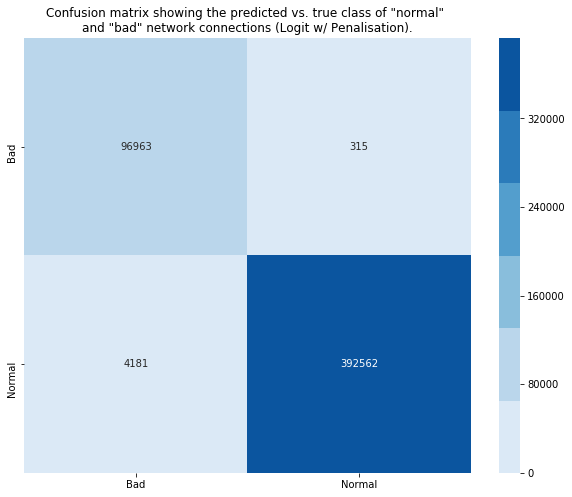

In [23]:
plot_confusion_matrix(logit_penalised_confusion_matrix, 'Logit w/ Penalisation')

False positive rate is below the threshold, but with the trade-off that it it's sensitivity is relatively low.

### SUPPORT VECTOR MACHINE (TODO: Kish) 


In [12]:
%%R

kddata = read.csv("../data/kddcup.data_10_percent.gz")
kddnames = read.table("../data/kddcup.names",sep = ":", skip = 1, as.is = T)
colnames(kddata)=c(kddnames[,1],"normal")

head(kddata)

In [7]:
%%R

unique_values = apply(kddata, 2, unique)
colcounts = lapply(unique_values,length)
constants = colcounts==1
not_constants = !constants
pruned_kddata = kddata[,not_constants]

In [12]:
%%R

levels(pruned_kddata$normal) = c(levels(pruned_kddata$normal), 'bad.')
pruned_kddata[which(pruned_kddata$normal!='normal.'), 'normal'] = 'bad.'
pruned_kddata[which(pruned_kddata$normal!='normal.'),]
pruned_kddata$normal = factor(pruned_kddata$normal, levels = c('normal.','bad.'))

In [14]:
%R summary(pruned_kddata)

array(['Min.   :    0.00  ', '1st Qu.:    0.00  ', 'Median :    0.00  ',
       'Mean   :   47.98  ', '3rd Qu.:    0.00  ', 'Max.   :58329.00  ',
       'NA', 'icmp:283602  ', 'tcp :190064  ', 'udp : 20354  ', 'NA',
       'NA', 'NA', 'NA', 'ecr_i   :281400  ', 'private :110893  ',
       'http    : 64292  ', 'smtp    :  9723  ', 'other   :  7237  ',
       'domain_u:  5863  ', '(Other) : 14612  ', 'SF     :378439  ',
       'S0     : 87007  ', 'REJ    : 26875  ', 'RSTR   :   903  ',
       'RSTO   :   579  ', 'SH     :   107  ', '(Other):   110  ',
       'Min.   :        0  ', '1st Qu.:       45  ',
       'Median :      520  ', 'Mean   :     3026  ',
       '3rd Qu.:     1032  ', 'Max.   :693375640  ', 'NA',
       'Min.   :      0  ', '1st Qu.:      0  ', 'Median :      0  ',
       'Mean   :    869  ', '3rd Qu.:      0  ', 'Max.   :5155468  ',
       'NA', 'Min.   :0.00e+00  ', '1st Qu.:0.00e+00  ',
       'Median :0.00e+00  ', 'Mean   :4.45e-05  ', '3rd Qu.:0.00e+00  ',
       'M

In [15]:
%%R

dataset1 = pruned_kddata[pruned_kddata$normal=="normal.",]
dataset2 = pruned_kddata[pruned_kddata$normal=="bad.",]

In [16]:
%%R

sample1_indexes = sample(nrow(dataset1), size = floor(0.9*nrow(dataset1)), prob=NULL)
sample1 = dataset1[sample1_indexes,]
length(sample1)

In [ ]:
%%R

sample2_indexes = sample(nrow(dataset2), size = floor(0.9*nrow(dataset2)),prob=NULL)
sample2 = dataset2[sample2_indexes,]

In [ ]:
%%R

main_sample1 = rbind(sample1,sample2)
test_data1 = dataset1[-sample1_indexes,]
test_data2 = dataset2[-sample2_indexes,]
main_test_data = rbind(test_data1,test_data2)

In [ ]:
%%R

classifier = svm(formula = normal ~ ., data = main_sample1, type = "C-classification", kernel = "linear")

In [ ]:
%%R

y_pred = predict(classifier, newdata = main_test_data)

In [13]:
%%R

c_trial = table(main_test_data$normal, y_pred)
trial_acc = (c_trial[1,1] + c_trial[2,2])/(c_trial[1,1] + c_trial[1,2] + c_trial[2,1] + c_trial[2,2])
trial_acc

[1] 0.998158


In [15]:
%R rm(classifier, y_pred); gc()  # Cleanup and free RAM

array([[2.41016600e+06, 1.28800000e+02, 4.60725000e+06, 2.46100000e+02,
        3.43872300e+06, 1.83700000e+02],
       [6.09023170e+07, 4.64700000e+02, 4.22044035e+08, 3.22000000e+03,
        4.43691940e+08, 3.38520000e+03]])

In [ ]:
%%R

folds = createFolds(main_sample1$normal, k = 10)

confusion_matrices = lapply(folds, function(x) {
  training_fold = main_sample1[-x, ]
  test_fold = main_sample1[x, ]
  classifier = svm(formula = normal ~ ., data = training_fold, type = "C-classification", kernel = "linear")
  y_pred = predict(classifier, newdata = test_fold)
  cm = table(test_fold$normal, y_pred)
  return(cm)
})

summary_matrix = Reduce('+', confusion_matrices)
summary_matrix

In [ ]:
%%R

accuracies = lapply(confusion_matrices, function(cm) {
  accuracy = (cm[1,1] + cm[2,2])/(cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
  return(accuracy)
})

Macc = mean(as.numeric(accuracies))
Macc

## Model Evaluation
### Plan

Here we apply performance metric to models.

Create a summary table with:
  - model
  - summary statistic 
    - maybe multiple?
    
Talk about how some models performed better under different conditions.

How applicable is each model for use in live intrusion detection in e.g. a corporate internal network.


### Writeup

## Evaluation of Performance Metric

### Plan
Here we evaluate how good our performance metric was.

Key points:
  - Limitations of our performance metric:
    - In the end, in order to pick a "winner" we need to decide on a single summary statistic. This approach to picking a model then becomes brute force and has loses the subtle differences in the models.
    - The class ratios in our dataset do not match real-world ratios, this means our performance metric may overly value certain criteria over others. (TODO: this needs to be more concrete).
    - Our performance metric in unable to take into account the conditions that an intrusion detection system would need to run under. Bla bla bla theres always a trade-off between model performance and speed.
    
    
**Dan** I think that creating a max false-positive rate threshold was good, but caused us to optimise our models for that, perhaps causing them to lower their sensitivity. Is this good, is it bad?

### Writeup

## References

[1]: rpy2, https://rpy2.bitbucket.io/.

[2]: KDD-CUP-99 Task Description, http://kdd.ics.uci.edu/databases/kddcup99/task.html.

[3]: Hettich, S. and Bay, S. D. (1999). The UCI KDD Archive [http://kdd.ics.uci.edu]. Irvine, CA: University of California, Department of Information and Computer Science.

[4]: Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[5]: Confusion Matrix – Another Single Value Metric – Kappa Statistic, https://standardwisdom.com/softwarejournal/2011/12/confusion-matrix-another-single-value-metric-kappa-statistic/

[6]: Practical Statistics for Data Science, 1st ed., by Peter Bruce and Andrew Bruce (O’Reilly Media, 2017).

[7]: Beautement, Adam, M. Angela Sasse, and Mike Wonham. "The compliance budget: managing security behaviour in organisations." Proceedings of the 2008 New Security Paradigms Workshop. ACM, 2009.

[8]: What-is-logistic-regression: https://www.statisticssolutions.com/what-is-logistic-regression/

[9]: Weirich, Dirk. “Persuasive password security.” CHI Extended Abstracts (2001).

[10]: Principal Component Analysis (PCA) for Feature Selection and some of its Pitfalls, http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/

[11]: Liu, Huan, and Lei Yu. "Toward integrating feature selection algorithms for classification and clustering." IEEE Transactions on knowledge and data engineering 17.4 (2005): 491-502. https://doi.org/10.1109/TKDE.2005.66

[12]: BST 764: Applied Statistical Modelling, https://web.as.uky.edu/statistics/users/pbreheny/764-F11/notes/8-30.pdf

[13]: Penalized logistic regression with rare events: Preliminary Results, p12 http://prema.mf.uni-lj.si/files/PREMAPreliminary_Lara_AS2015_f98.pdf.

[14]: Logistic-Regression: Likelihood Ratio (or Deviance) Test, https://onlinecourses.science.psu.edu/stat501/node/374/ 

[15]: Katos, V., 2007. Network intrusion detection: Evaluating cluster, discriminant, and logit analysis. Information Sciences, 177(15), pp.3060-3073. https://doi.org/10.1016/j.ins.2007.02.034 
